In [59]:
%config IPCompleter.greedy=True
%config IPCompleter.use_jedi=False

In [60]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA, TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_mutual_info_score, silhouette_samples, mean_squared_error
from sklearn.random_projection import GaussianRandomProjection
from sklearn import mixture
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

from numpy import linalg as LA

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import scipy
from scipy.linalg import pinv
import pandas as pd

import itertools
import scipy.stats

import time

import warnings
warnings.filterwarnings('ignore')

import plotly.offline as py
py.init_notebook_mode(connected=True)

import plotly.graph_objs as go

from sklearn.preprocessing import StandardScaler

In [61]:
df = pd.read_csv('data/minist_train.csv')

df_sample = df.sample(1000)

y = df_sample[df_sample.columns[0]]
X = df_sample[df_sample.columns[1:]]

# split the training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dimensionality Reduction
# PCA

In [62]:
X_PCA = PCA(n_components = 3).fit_transform(X)

# ICA

In [63]:
X_ICA = FastICA(n_components = 3).fit_transform(X)

# RP

In [64]:
X_RP = GaussianRandomProjection(n_components = 5).fit_transform(X)

# DT

In [65]:
etc = ExtraTreesClassifier(n_estimators = 100)
etc = etc.fit(X,y)
model = SelectFromModel(etc, prefit=True)
X_Trees = model.transform(X)

# K-Means on Dimensionality Reduction
# Inertia

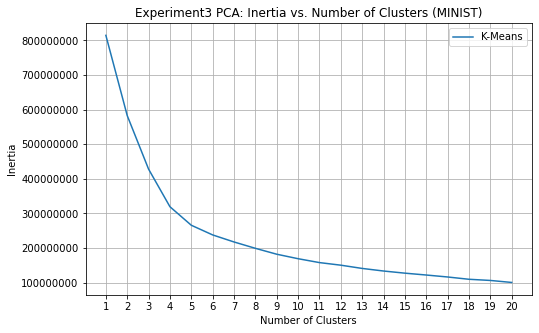

In [66]:
range_n_clusters = np.arange(1,21,1)
inertia = []
for n_clusters in range_n_clusters:
    k_means_clustering = KMeans(n_clusters=n_clusters, random_state=42)
    k_means_clustering.fit(X_PCA)
    inertia.append(k_means_clustering.inertia_)
inertia = np.array(inertia)
plt.figure(figsize=(8,5))
plt.plot(range_n_clusters,inertia, label = "K-Means")
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.ticklabel_format(style='plain') 
plt.xticks(range_n_clusters)
plt.title('Experiment3 PCA: Inertia vs. Number of Clusters (MINIST)')
plt.grid()
plt.legend()
plt.savefig('minist_exp3_kmeans_pca_inertia.png')

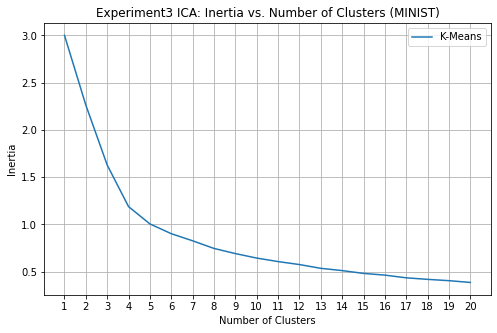

In [67]:
range_n_clusters = np.arange(1,21,1)
inertia = []
for n_clusters in range_n_clusters:
    k_means_clustering = KMeans(n_clusters=n_clusters, random_state=42)
    k_means_clustering.fit(X_ICA)
    inertia.append(k_means_clustering.inertia_)
inertia = np.array(inertia)
plt.figure(figsize=(8,5))
plt.plot(range_n_clusters,inertia, label = "K-Means")
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.ticklabel_format(style='plain') 
plt.xticks(range_n_clusters)
plt.title('Experiment3 ICA: Inertia vs. Number of Clusters (MINIST)')
plt.grid()
plt.legend()
plt.savefig('minist_exp3_kmeans_ica_inertia.png')

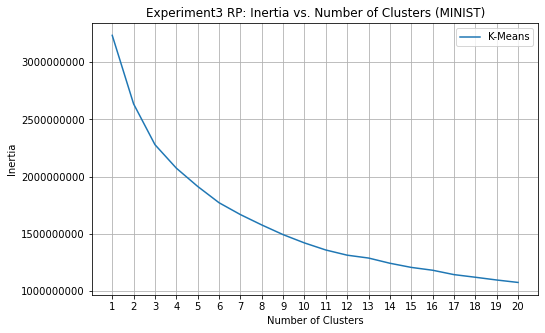

In [68]:
range_n_clusters = np.arange(1,21,1)
inertia = []
for n_clusters in range_n_clusters:
    k_means_clustering = KMeans(n_clusters=n_clusters, random_state=42)
    k_means_clustering.fit(X_RP)
    inertia.append(k_means_clustering.inertia_)
inertia = np.array(inertia)
plt.figure(figsize=(8,5))
plt.plot(range_n_clusters,inertia, label = "K-Means")
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.ticklabel_format(style='plain') 
plt.xticks(range_n_clusters)
plt.title('Experiment3 RP: Inertia vs. Number of Clusters (MINIST)')
plt.grid()
plt.legend()
plt.savefig('minist_exp3_kmeans_rp_inertia.png')

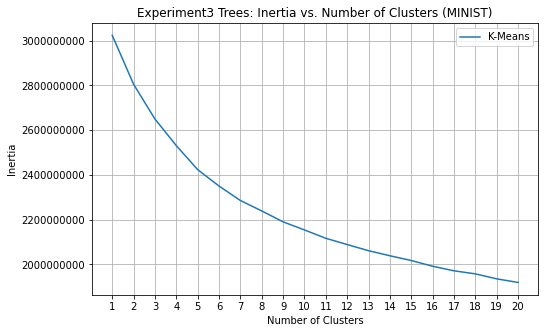

In [69]:
range_n_clusters = np.arange(1,21,1)
inertia = []
for n_clusters in range_n_clusters:
    k_means_clustering = KMeans(n_clusters=n_clusters, random_state=42)
    k_means_clustering.fit(X_Trees)
    inertia.append(k_means_clustering.inertia_)
inertia = np.array(inertia)
plt.figure(figsize=(8,5))
plt.plot(range_n_clusters,inertia, label = "K-Means")
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.ticklabel_format(style='plain') 
plt.xticks(range_n_clusters)
plt.title('Experiment3 Trees: Inertia vs. Number of Clusters (MINIST)')
plt.grid()
plt.legend()
plt.savefig('minist_exp3_kmeans_Trees_inertia.png')

# Silhouette Score

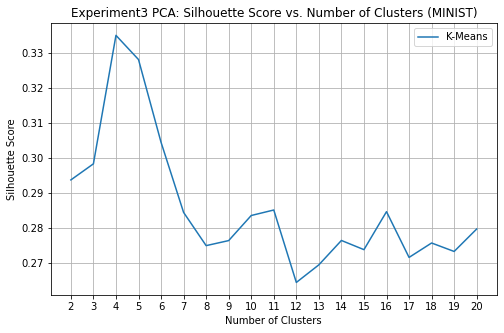

In [70]:
range_n_clusters = np.arange(2,21,1)
silhouette_avg = []
for n_clusters in range_n_clusters:
    k_means_clustering = KMeans(n_clusters=n_clusters, random_state=42)
    k_means_clustering.fit(X_PCA)
    silhouette_avg.append(silhouette_score(X_PCA, k_means_clustering.labels_))
silhouette_avg = np.array(silhouette_avg)
plt.figure(figsize=(8,5))
plt.plot(range_n_clusters,silhouette_avg, label = "K-Means")
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.ticklabel_format(style='plain') 
plt.xticks(range_n_clusters) 
plt.title('Experiment3 PCA: Silhouette Score vs. Number of Clusters (MINIST)')
plt.grid()
plt.legend()
plt.savefig('minist_exp3_kmeans_pca_silhouette.png')
plt.show()

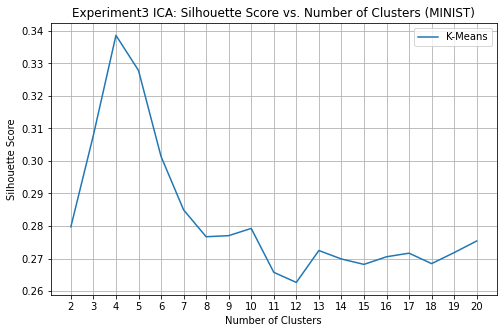

In [71]:
range_n_clusters = np.arange(2,21,1)
silhouette_avg = []
for n_clusters in range_n_clusters:
    k_means_clustering = KMeans(n_clusters=n_clusters, random_state=42)
    k_means_clustering.fit(X_ICA)
    silhouette_avg.append(silhouette_score(X_ICA, k_means_clustering.labels_))
silhouette_avg = np.array(silhouette_avg)
plt.figure(figsize=(8,5))
plt.plot(range_n_clusters,silhouette_avg, label = "K-Means")
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.ticklabel_format(style='plain') 
plt.xticks(range_n_clusters) 
plt.title('Experiment3 ICA: Silhouette Score vs. Number of Clusters (MINIST)')
plt.grid()
plt.legend()
plt.savefig('minist_exp3_kmeans_ica_silhouette.png')
plt.show()

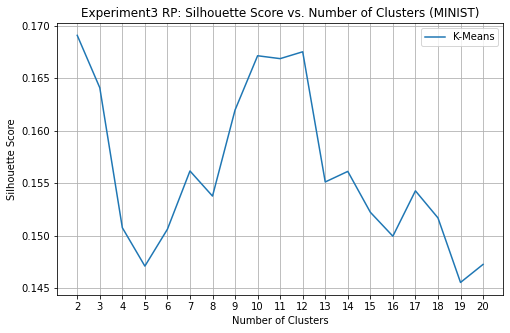

In [72]:
range_n_clusters = np.arange(2,21,1)
silhouette_avg = []
for n_clusters in range_n_clusters:
    k_means_clustering = KMeans(n_clusters=n_clusters, random_state=42)
    k_means_clustering.fit(X_RP)
    silhouette_avg.append(silhouette_score(X_RP, k_means_clustering.labels_))
silhouette_avg = np.array(silhouette_avg)
plt.figure(figsize=(8,5))
plt.plot(range_n_clusters,silhouette_avg, label = "K-Means")
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.ticklabel_format(style='plain') 
plt.xticks(range_n_clusters) 
plt.title('Experiment3 RP: Silhouette Score vs. Number of Clusters (MINIST)')
plt.grid()
plt.legend()
plt.savefig('minist_exp3_kmeans_rp_silhouette.png')
plt.show()

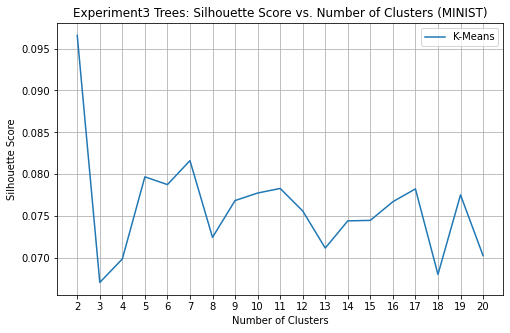

In [73]:
range_n_clusters = np.arange(2,21,1)
silhouette_avg = []
for n_clusters in range_n_clusters:
    k_means_clustering = KMeans(n_clusters=n_clusters, random_state=42)
    k_means_clustering.fit(X_Trees)
    silhouette_avg.append(silhouette_score(X_Trees, k_means_clustering.labels_))
silhouette_avg = np.array(silhouette_avg)
plt.figure(figsize=(8,5))
plt.plot(range_n_clusters,silhouette_avg, label = "K-Means")
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.ticklabel_format(style='plain') 
plt.xticks(range_n_clusters) 
plt.title('Experiment3 Trees: Silhouette Score vs. Number of Clusters (MINIST)')
plt.grid()
plt.legend()
plt.savefig('minist_exp3_kmeans_Trees_silhouette.png')
plt.show()

# AMI

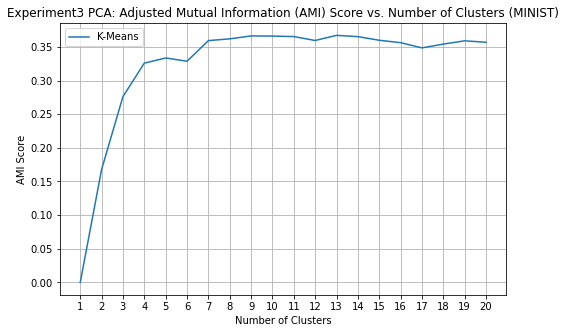

In [74]:
range_n_clusters = np.arange(1,21,1)
adjusted_mutual_info_score_value = []
for n_clusters in range_n_clusters:
    k_means_clustering = KMeans(n_clusters=n_clusters, random_state=42)
    k_means_clustering.fit(X_PCA)
    adjusted_mutual_info_score_value.append(adjusted_mutual_info_score(y, k_means_clustering.labels_))
adjusted_mutual_info_score_value = np.array(adjusted_mutual_info_score_value)
plt.figure(figsize=(8,5))
plt.plot(range_n_clusters,adjusted_mutual_info_score_value, label = "K-Means")
plt.xlabel('Number of Clusters')
plt.ylabel('AMI Score')
plt.ticklabel_format(style='plain') 
plt.xticks(range_n_clusters) 
plt.title('Experiment3 PCA: Adjusted Mutual Information (AMI) Score vs. Number of Clusters (MINIST)')
plt.grid()
plt.legend()
plt.savefig('minist_exp3_kmeans_pca_AMI.png')
plt.show()

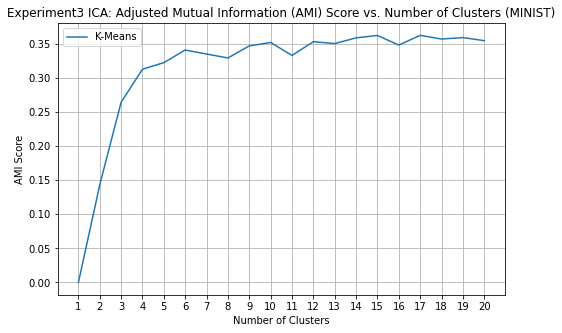

In [75]:
range_n_clusters = np.arange(1,21,1)
adjusted_mutual_info_score_value = []
for n_clusters in range_n_clusters:
    k_means_clustering = KMeans(n_clusters=n_clusters, random_state=42)
    k_means_clustering.fit(X_ICA)
    adjusted_mutual_info_score_value.append(adjusted_mutual_info_score(y, k_means_clustering.labels_))
adjusted_mutual_info_score_value = np.array(adjusted_mutual_info_score_value)
plt.figure(figsize=(8,5))
plt.plot(range_n_clusters,adjusted_mutual_info_score_value, label = "K-Means")
plt.xlabel('Number of Clusters')
plt.ylabel('AMI Score')
plt.ticklabel_format(style='plain') 
plt.xticks(range_n_clusters) 
plt.title('Experiment3 ICA: Adjusted Mutual Information (AMI) Score vs. Number of Clusters (MINIST)')
plt.grid()
plt.legend()
plt.savefig('minist_exp3_kmeans_ica_AMI.png')
plt.show()

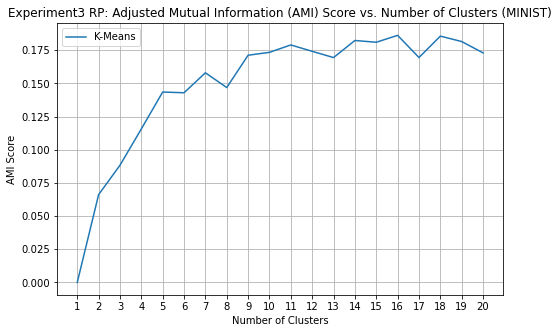

In [76]:
range_n_clusters = np.arange(1,21,1)
adjusted_mutual_info_score_value = []
for n_clusters in range_n_clusters:
    k_means_clustering = KMeans(n_clusters=n_clusters, random_state=42)
    k_means_clustering.fit(X_RP)
    adjusted_mutual_info_score_value.append(adjusted_mutual_info_score(y, k_means_clustering.labels_))
adjusted_mutual_info_score_value = np.array(adjusted_mutual_info_score_value)
plt.figure(figsize=(8,5))
plt.plot(range_n_clusters,adjusted_mutual_info_score_value, label = "K-Means")
plt.xlabel('Number of Clusters')
plt.ylabel('AMI Score')
plt.ticklabel_format(style='plain') 
plt.xticks(range_n_clusters) 
plt.title('Experiment3 RP: Adjusted Mutual Information (AMI) Score vs. Number of Clusters (MINIST)')
plt.grid()
plt.legend()
plt.savefig('minist_exp3_kmeans_rp_AMI.png')
plt.show()

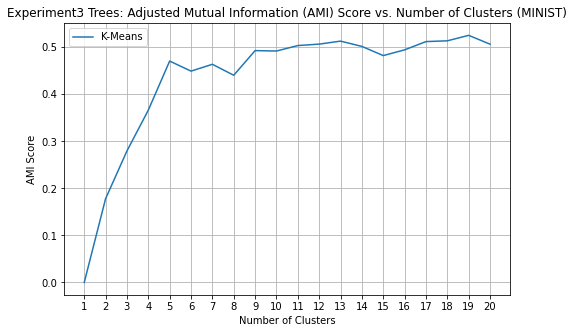

In [77]:
range_n_clusters = np.arange(1,21,1)
adjusted_mutual_info_score_value = []
for n_clusters in range_n_clusters:
    k_means_clustering = KMeans(n_clusters=n_clusters, random_state=42)
    k_means_clustering.fit(X_Trees)
    adjusted_mutual_info_score_value.append(adjusted_mutual_info_score(y, k_means_clustering.labels_))
adjusted_mutual_info_score_value = np.array(adjusted_mutual_info_score_value)
plt.figure(figsize=(8,5))
plt.plot(range_n_clusters,adjusted_mutual_info_score_value, label = "K-Means")
plt.xlabel('Number of Clusters')
plt.ylabel('AMI Score')
plt.ticklabel_format(style='plain') 
plt.xticks(range_n_clusters) 
plt.title('Experiment3 Trees: Adjusted Mutual Information (AMI) Score vs. Number of Clusters (MINIST)')
plt.grid()
plt.legend()
plt.savefig('minist_exp3_kmeans_Trees_AMI.png')
plt.show()

# Distribution

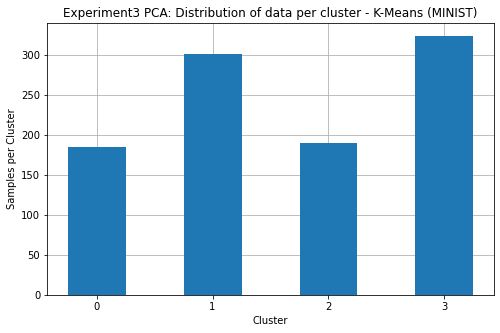

In [106]:
k = 4
k_means_clustering = KMeans(n_clusters=k, random_state=42)
y_pred = k_means_clustering.fit_predict(X_PCA)


plt.figure(figsize=(8,5))
plt.hist(y_pred, bins=np.arange(0, k + 1) - 0.5, rwidth=0.5, zorder=2)
plt.xticks(np.arange(0, k))
plt.xlabel('Cluster')
plt.ylabel('Samples per Cluster')
plt.title('Experiment3 PCA: Distribution of data per cluster - K-Means (MINIST)')
plt.grid()
plt.savefig('minist_exp3_kmeans_pca_distribution.png')

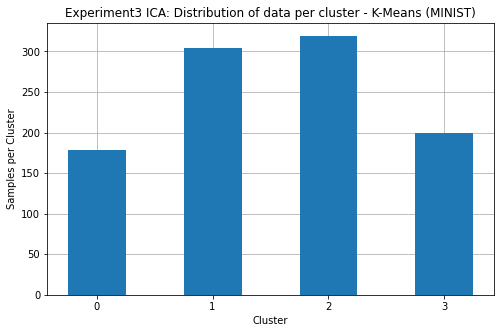

In [107]:
k = 4
k_means_clustering = KMeans(n_clusters=k, random_state=42)
y_pred = k_means_clustering.fit_predict(X_ICA)


plt.figure(figsize=(8,5))
plt.hist(y_pred, bins=np.arange(0, k + 1) - 0.5, rwidth=0.5, zorder=2)
plt.xticks(np.arange(0, k))
plt.xlabel('Cluster')
plt.ylabel('Samples per Cluster')
plt.title('Experiment3 ICA: Distribution of data per cluster - K-Means (MINIST)')
plt.grid()
plt.savefig('minist_exp3_kmeans_ica_distribution.png')

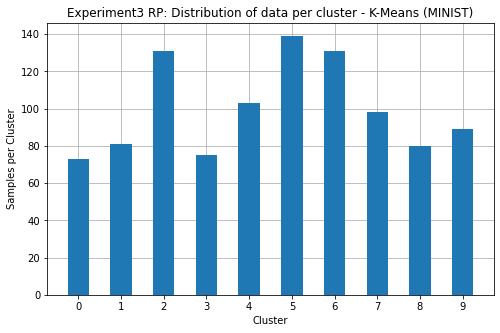

In [108]:
k = 10
k_means_clustering = KMeans(n_clusters=k, random_state=42)
y_pred = k_means_clustering.fit_predict(X_RP)


plt.figure(figsize=(8,5))
plt.hist(y_pred, bins=np.arange(0, k + 1) - 0.5, rwidth=0.5, zorder=2)
plt.xticks(np.arange(0, k))
plt.xlabel('Cluster')
plt.ylabel('Samples per Cluster')
plt.title('Experiment3 RP: Distribution of data per cluster - K-Means (MINIST)')
plt.grid()
plt.savefig('minist_exp3_kmeans_rp_distribution.png')

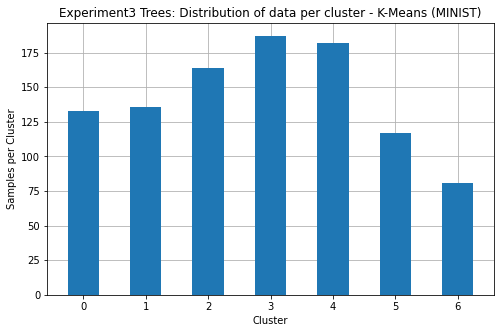

In [81]:
k = 7
k_means_clustering = KMeans(n_clusters=k, random_state=42)
y_pred = k_means_clustering.fit_predict(X_Trees)


plt.figure(figsize=(8,5))
plt.hist(y_pred, bins=np.arange(0, k + 1) - 0.5, rwidth=0.5, zorder=2)
plt.xticks(np.arange(0, k))
plt.xlabel('Cluster')
plt.ylabel('Samples per Cluster')
plt.title('Experiment3 Trees: Distribution of data per cluster - K-Means (MINIST)')
plt.grid()
plt.savefig('minist_exp3_kmeans_Trees_distribution.png')

# Plot

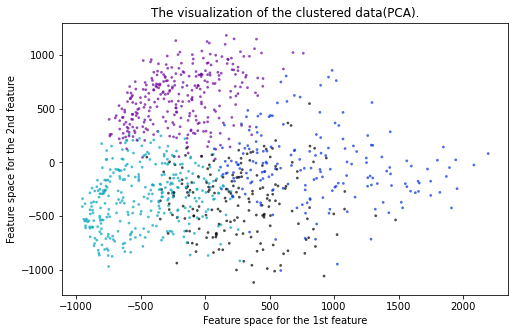

In [109]:
k_means_opt = KMeans(n_clusters=4, random_state=42)
k_means_opt.fit(X_PCA)
cluster_labels = k_means_opt.labels_
colors = cm.nipy_spectral(cluster_labels.astype(float) / 9)
plt.figure(figsize=(8,5))
plt.scatter( X_PCA[:, 0], X_PCA[:, 1],marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")
# Labeling the clusters
# centers = k_means_opt.cluster_centers_
# # Draw white circles at cluster centers
# plt.scatter(centers[:, 0],centers[:, 1],marker="o",c="white",alpha=1,s=200,edgecolor="k",)

# for i, c in enumerate(centers):
#     plt.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

plt.title("The visualization of the clustered data(PCA).")
plt.xlabel("Feature space for the 1st feature")
plt.ylabel("Feature space for the 2nd feature")
plt.savefig('minist_exp3_kmeans_pca_plot.png')
plt.show()

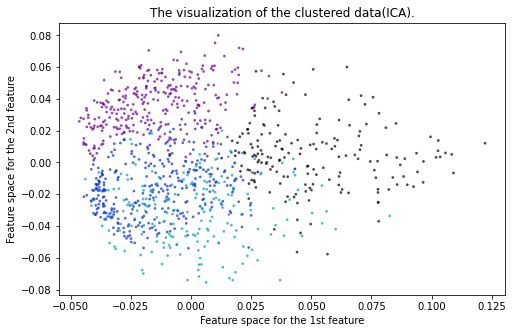

In [110]:
k_means_opt = KMeans(n_clusters=4, random_state=42)
k_means_opt.fit(X_ICA)
cluster_labels = k_means_opt.labels_
colors = cm.nipy_spectral(cluster_labels.astype(float) / 9)
plt.figure(figsize=(8,5))
plt.scatter( X_ICA[:, 0], X_ICA[:, 1],marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")
# Labeling the clusters
# centers = k_means_opt.cluster_centers_
# # Draw white circles at cluster centers
# plt.scatter(centers[:, 0],centers[:, 1],marker="o",c="white",alpha=1,s=200,edgecolor="k",)

# for i, c in enumerate(centers):
#     plt.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

plt.title("The visualization of the clustered data(ICA).")
plt.xlabel("Feature space for the 1st feature")
plt.ylabel("Feature space for the 2nd feature")
plt.savefig('minist_exp3_kmeans_ica_plot.png')
plt.show()

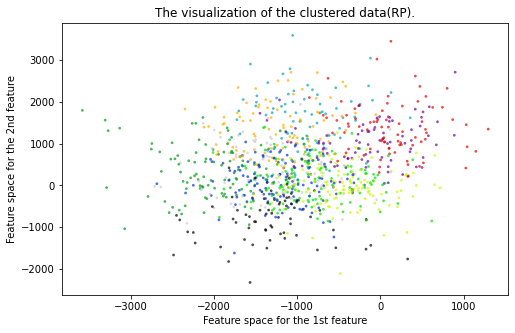

In [111]:
k_means_opt = KMeans(n_clusters=10, random_state=42)
k_means_opt.fit(X_RP)
cluster_labels = k_means_opt.labels_
colors = cm.nipy_spectral(cluster_labels.astype(float) / 9)
plt.figure(figsize=(8,5))
plt.scatter( X_RP[:, 0], X_RP[:, 1],marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")
# Labeling the clusters
# centers = k_means_opt.cluster_centers_
# # Draw white circles at cluster centers
# plt.scatter(centers[:, 0],centers[:, 1],marker="o",c="white",alpha=1,s=200,edgecolor="k",)

# for i, c in enumerate(centers):
#     plt.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

plt.title("The visualization of the clustered data(RP).")
plt.xlabel("Feature space for the 1st feature")
plt.ylabel("Feature space for the 2nd feature")
plt.savefig('minist_exp3_kmeans_rp_plot.png')
plt.show()

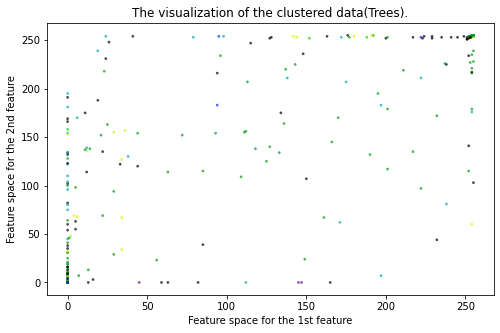

In [85]:
k_means_opt = KMeans(n_clusters=7, random_state=42)
k_means_opt.fit(X_Trees)
cluster_labels = k_means_opt.labels_
colors = cm.nipy_spectral(cluster_labels.astype(float) / 9)
plt.figure(figsize=(8,5))
plt.scatter( X_Trees[:, 0], X_Trees[:, 1],marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")
# Labeling the clusters
# centers = k_means_opt.cluster_centers_
# # Draw white circles at cluster centers
# plt.scatter(centers[:, 0],centers[:, 1],marker="o",c="white",alpha=1,s=200,edgecolor="k",)

# for i, c in enumerate(centers):
#     plt.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

plt.title("The visualization of the clustered data(Trees).")
plt.xlabel("Feature space for the 1st feature")
plt.ylabel("Feature space for the 2nd feature")
plt.savefig('minist_exp3_kmeans_Trees_plot.png')
plt.show()

# IMSHOW

# GMM
# BIC

Lowest BIC currently for spherical 1
Lowest BIC currently for spherical 2
Lowest BIC currently for spherical 3
Lowest BIC currently for spherical 4
Lowest BIC currently for spherical 5
Lowest BIC currently for spherical 11
Lowest BIC currently for diag 6
Lowest BIC currently for full 5
Lowest BIC currently for full 6


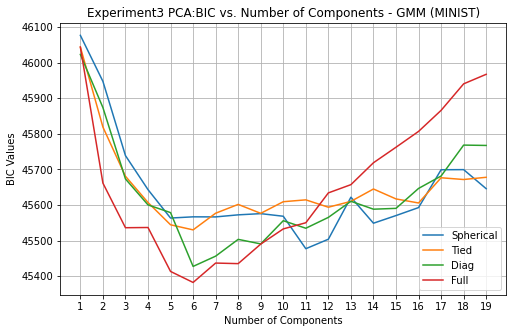

In [86]:
lowest_bic = np.infty
num_components_values = range(1, 20)
covariances = ['spherical', 'tied', 'diag', 'full']
bic = np.zeros((len(covariances),len(num_components_values)))
for i, covariance in enumerate(covariances):
    for j, num_components in enumerate(num_components_values):
        gmm = mixture.GaussianMixture(n_components=num_components, covariance_type=covariance)
        gmm.fit(X_PCA)
        bic[i][j] = gmm.bic(X_PCA)
        if bic[i][j] < lowest_bic:
            lowest_bic = bic[i][j]
            print("Lowest BIC currently for", covariance, num_components)
            best_gmm = gmm
plt.figure(figsize=(8,5))
plt.plot(num_components_values, bic[0], label = 'Spherical')
plt.plot(num_components_values, bic[1], label = 'Tied')
plt.plot(num_components_values, bic[2], label = 'Diag')
plt.plot(num_components_values, bic[3], label = 'Full')
plt.legend()
plt.ticklabel_format(style='plain') 
plt.xticks(num_components_values)
plt.grid()
plt.title("Experiment3 PCA:BIC vs. Number of Components - GMM (MINIST)")
plt.xlabel("Number of Components")
plt.ylabel("BIC Values")
plt.savefig('minist_exp3_gmm_PCA_bic.png')
plt.show()

Lowest BIC currently for spherical 1
Lowest BIC currently for spherical 2
Lowest BIC currently for spherical 4
Lowest BIC currently for spherical 5
Lowest BIC currently for spherical 8
Lowest BIC currently for spherical 9
Lowest BIC currently for spherical 10
Lowest BIC currently for diag 7
Lowest BIC currently for full 5
Lowest BIC currently for full 6


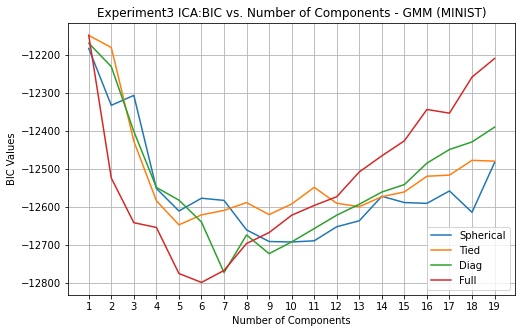

In [87]:
lowest_bic = np.infty
num_components_values = range(1, 20)
covariances = ['spherical', 'tied', 'diag', 'full']
bic = np.zeros((len(covariances),len(num_components_values)))
for i, covariance in enumerate(covariances):
    for j, num_components in enumerate(num_components_values):
        gmm = mixture.GaussianMixture(n_components=num_components, covariance_type=covariance)
        gmm.fit(X_ICA)
        bic[i][j] = gmm.bic(X_ICA)
        if bic[i][j] < lowest_bic:
            lowest_bic = bic[i][j]
            print("Lowest BIC currently for", covariance, num_components)
            best_gmm = gmm
plt.figure(figsize=(8,5))
plt.plot(num_components_values, bic[0], label = 'Spherical')
plt.plot(num_components_values, bic[1], label = 'Tied')
plt.plot(num_components_values, bic[2], label = 'Diag')
plt.plot(num_components_values, bic[3], label = 'Full')
plt.legend()
plt.ticklabel_format(style='plain') 
plt.xticks(num_components_values)
plt.grid()
plt.title("Experiment3 ICA:BIC vs. Number of Components - GMM (MINIST)")
plt.xlabel("Number of Components")
plt.ylabel("BIC Values")
plt.savefig('minist_exp3_gmm_ICA_bic.png')
plt.show()

Lowest BIC currently for spherical 1
Lowest BIC currently for spherical 2
Lowest BIC currently for spherical 3
Lowest BIC currently for spherical 5
Lowest BIC currently for tied 1


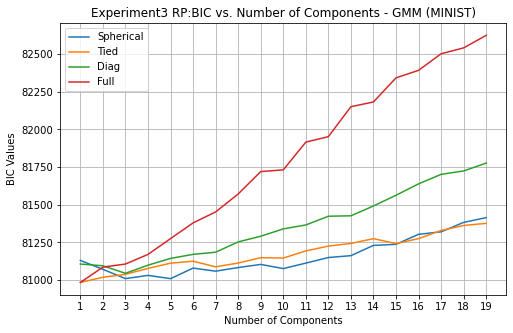

In [88]:
lowest_bic = np.infty
num_components_values = range(1, 20)
covariances = ['spherical', 'tied', 'diag', 'full']
bic = np.zeros((len(covariances),len(num_components_values)))
for i, covariance in enumerate(covariances):
    for j, num_components in enumerate(num_components_values):
        gmm = mixture.GaussianMixture(n_components=num_components, covariance_type=covariance)
        gmm.fit(X_RP)
        bic[i][j] = gmm.bic(X_RP)
        if bic[i][j] < lowest_bic:
            lowest_bic = bic[i][j]
            print("Lowest BIC currently for", covariance, num_components)
            best_gmm = gmm
plt.figure(figsize=(8,5))
plt.plot(num_components_values, bic[0], label = 'Spherical')
plt.plot(num_components_values, bic[1], label = 'Tied')
plt.plot(num_components_values, bic[2], label = 'Diag')
plt.plot(num_components_values, bic[3], label = 'Full')
plt.legend()
plt.ticklabel_format(style='plain') 
plt.xticks(num_components_values)
plt.grid()
plt.title("Experiment3 RP:BIC vs. Number of Components - GMM (MINIST)")
plt.xlabel("Number of Components")
plt.ylabel("BIC Values")
plt.savefig('minist_exp3_gmm_RP_bic.png')
plt.show()

Lowest BIC currently for spherical 1
Lowest BIC currently for spherical 2
Lowest BIC currently for spherical 3
Lowest BIC currently for spherical 4
Lowest BIC currently for spherical 5
Lowest BIC currently for spherical 6
Lowest BIC currently for spherical 7
Lowest BIC currently for spherical 8
Lowest BIC currently for spherical 9
Lowest BIC currently for spherical 10
Lowest BIC currently for spherical 11
Lowest BIC currently for spherical 12
Lowest BIC currently for spherical 13
Lowest BIC currently for spherical 14
Lowest BIC currently for spherical 15
Lowest BIC currently for spherical 16
Lowest BIC currently for spherical 17
Lowest BIC currently for spherical 19
Lowest BIC currently for tied 1
Lowest BIC currently for diag 4
Lowest BIC currently for diag 6
Lowest BIC currently for diag 7
Lowest BIC currently for diag 8
Lowest BIC currently for diag 9
Lowest BIC currently for diag 10
Lowest BIC currently for diag 12
Lowest BIC currently for diag 14
Lowest BIC currently for diag 15
L

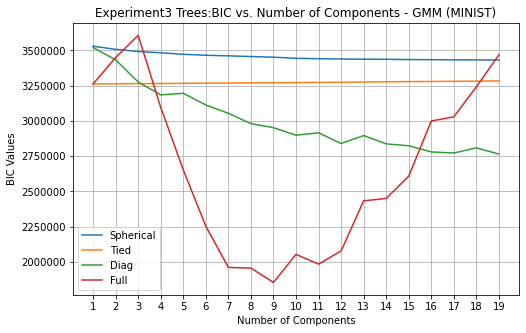

In [89]:
lowest_bic = np.infty
num_components_values = range(1, 20)
covariances = ['spherical', 'tied', 'diag', 'full']
bic = np.zeros((len(covariances),len(num_components_values)))
for i, covariance in enumerate(covariances):
    for j, num_components in enumerate(num_components_values):
        gmm = mixture.GaussianMixture(n_components=num_components, covariance_type=covariance)
        gmm.fit(X_Trees)
        bic[i][j] = gmm.bic(X_Trees)
        if bic[i][j] < lowest_bic:
            lowest_bic = bic[i][j]
            print("Lowest BIC currently for", covariance, num_components)
            best_gmm = gmm
plt.figure(figsize=(8,5))
plt.plot(num_components_values, bic[0], label = 'Spherical')
plt.plot(num_components_values, bic[1], label = 'Tied')
plt.plot(num_components_values, bic[2], label = 'Diag')
plt.plot(num_components_values, bic[3], label = 'Full')
plt.legend()
plt.ticklabel_format(style='plain') 
plt.xticks(num_components_values)
plt.grid()
plt.title("Experiment3 Trees:BIC vs. Number of Components - GMM (MINIST)")
plt.xlabel("Number of Components")
plt.ylabel("BIC Values")
plt.savefig('minist_exp3_gmm_Trees_bic.png')
plt.show()

# silhouette

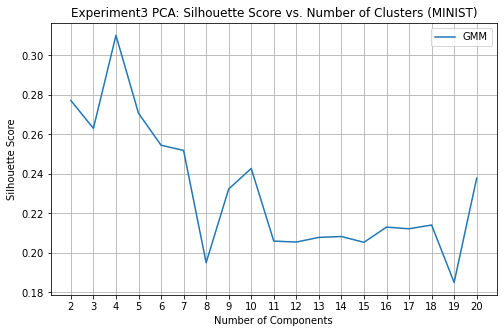

In [90]:
num_components_values = np.arange(2,21,1)
silhouette_avg = []
for num_components in num_components_values:
    gmm = mixture.GaussianMixture(n_components=num_components, covariance_type="full")
    gmm_labels = gmm.fit_predict(X_PCA)
    silhouette_avg.append(silhouette_score(X_PCA, gmm_labels))
silhouette_avg = np.array(silhouette_avg)
plt.figure(figsize=(8,5))
plt.plot(num_components_values,silhouette_avg, label = "GMM")
plt.xlabel('Number of Components')
plt.ylabel('Silhouette Score')
plt.ticklabel_format(style='plain') 
plt.xticks(num_components_values) 
plt.title('Experiment3 PCA: Silhouette Score vs. Number of Clusters (MINIST)')
plt.grid()
plt.legend()
plt.savefig('minist_exp3_gmm_PCA_silhouette.png')
plt.show()

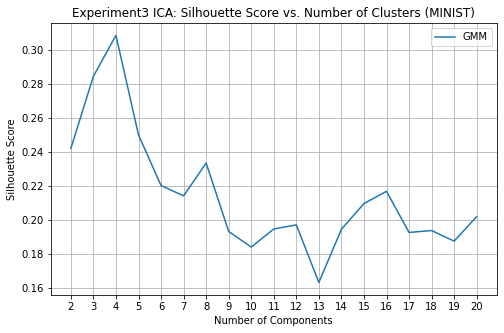

In [91]:
num_components_values = np.arange(2,21,1)
silhouette_avg = []
for num_components in num_components_values:
    gmm = mixture.GaussianMixture(n_components=num_components, covariance_type="full")
    gmm_labels = gmm.fit_predict(X_ICA)
    silhouette_avg.append(silhouette_score(X_ICA, gmm_labels))
silhouette_avg = np.array(silhouette_avg)
plt.figure(figsize=(8,5))
plt.plot(num_components_values,silhouette_avg, label = "GMM")
plt.xlabel('Number of Components')
plt.ylabel('Silhouette Score')
plt.ticklabel_format(style='plain') 
plt.xticks(num_components_values) 
plt.title('Experiment3 ICA: Silhouette Score vs. Number of Clusters (MINIST)')
plt.grid()
plt.legend()
plt.savefig('minist_exp3_gmm_ICA_silhouette.png')
plt.show()

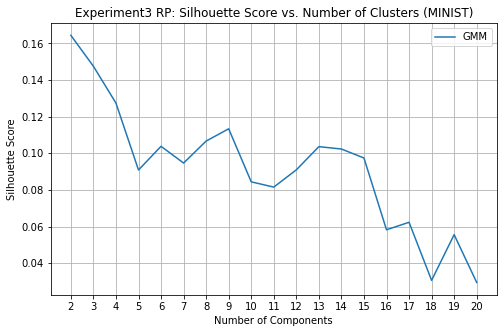

In [92]:
num_components_values = np.arange(2,21,1)
silhouette_avg = []
for num_components in num_components_values:
    gmm = mixture.GaussianMixture(n_components=num_components, covariance_type="full")
    gmm_labels = gmm.fit_predict(X_RP)
    silhouette_avg.append(silhouette_score(X_RP, gmm_labels))
silhouette_avg = np.array(silhouette_avg)
plt.figure(figsize=(8,5))
plt.plot(num_components_values,silhouette_avg, label = "GMM")
plt.xlabel('Number of Components')
plt.ylabel('Silhouette Score')
plt.ticklabel_format(style='plain') 
plt.xticks(num_components_values) 
plt.title('Experiment3 RP: Silhouette Score vs. Number of Clusters (MINIST)')
plt.grid()
plt.legend()
plt.savefig('minist_exp3_gmm_RP_silhouette.png')
plt.show()

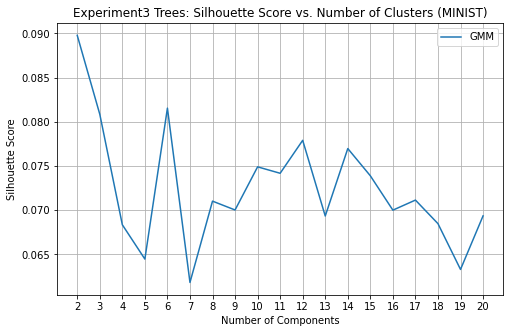

In [93]:
num_components_values = np.arange(2,21,1)
silhouette_avg = []
for num_components in num_components_values:
    gmm = mixture.GaussianMixture(n_components=num_components, covariance_type="full")
    gmm_labels = gmm.fit_predict(X_Trees)
    silhouette_avg.append(silhouette_score(X_Trees, gmm_labels))
silhouette_avg = np.array(silhouette_avg)
plt.figure(figsize=(8,5))
plt.plot(num_components_values,silhouette_avg, label = "GMM")
plt.xlabel('Number of Components')
plt.ylabel('Silhouette Score')
plt.ticklabel_format(style='plain') 
plt.xticks(num_components_values) 
plt.title('Experiment3 Trees: Silhouette Score vs. Number of Clusters (MINIST)')
plt.grid()
plt.legend()
plt.savefig('minist_exp3_gmm_Trees_silhouette.png')
plt.show()

# adjusted_mutual_info_score

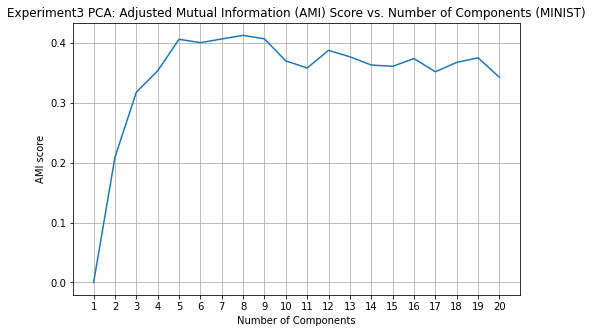

In [94]:
num_components_values = np.arange(1,21,1)
adjusted_mutual_info_score_value = []
for num_components in num_components_values:
    gmm = mixture.GaussianMixture(n_components=num_components, covariance_type="full")
    gmm_labels = gmm.fit_predict(X_PCA)
    adjusted_mutual_info_score_value.append(adjusted_mutual_info_score(y, gmm_labels))
adjusted_mutual_info_score_value = np.array(adjusted_mutual_info_score_value)
plt.figure(figsize=(8,5))
plt.plot(num_components_values,adjusted_mutual_info_score_value, label = "GMM")
plt.xlabel('Number of Components')
plt.ylabel('AMI score')
plt.ticklabel_format(style='plain') 
plt.xticks(num_components_values) 
plt.title('Experiment3 PCA: Adjusted Mutual Information (AMI) Score vs. Number of Components (MINIST)')
plt.grid()
plt.savefig('minist_exp3_gmm_PCA_AMI.png')
plt.show()

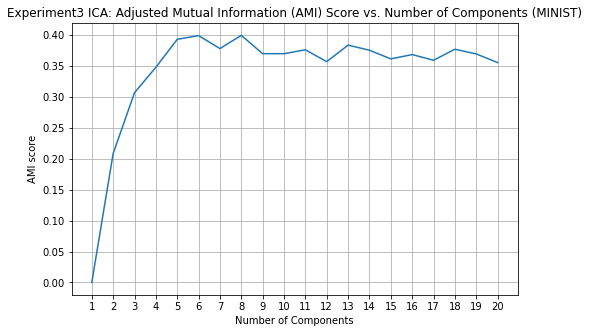

In [95]:
num_components_values = np.arange(1,21,1)
adjusted_mutual_info_score_value = []
for num_components in num_components_values:
    gmm = mixture.GaussianMixture(n_components=num_components, covariance_type="full")
    gmm_labels = gmm.fit_predict(X_ICA)
    adjusted_mutual_info_score_value.append(adjusted_mutual_info_score(y, gmm_labels))
adjusted_mutual_info_score_value = np.array(adjusted_mutual_info_score_value)
plt.figure(figsize=(8,5))
plt.plot(num_components_values,adjusted_mutual_info_score_value, label = "GMM")
plt.xlabel('Number of Components')
plt.ylabel('AMI score')
plt.ticklabel_format(style='plain') 
plt.xticks(num_components_values) 
plt.title('Experiment3 ICA: Adjusted Mutual Information (AMI) Score vs. Number of Components (MINIST)')
plt.grid()
plt.savefig('minist_exp3_gmm_ICA_AMI.png')
plt.show()

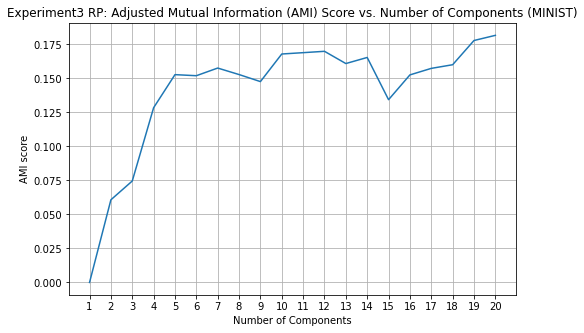

In [96]:
num_components_values = np.arange(1,21,1)
adjusted_mutual_info_score_value = []
for num_components in num_components_values:
    gmm = mixture.GaussianMixture(n_components=num_components, covariance_type="full")
    gmm_labels = gmm.fit_predict(X_RP)
    adjusted_mutual_info_score_value.append(adjusted_mutual_info_score(y, gmm_labels))
adjusted_mutual_info_score_value = np.array(adjusted_mutual_info_score_value)
plt.figure(figsize=(8,5))
plt.plot(num_components_values,adjusted_mutual_info_score_value, label = "GMM")
plt.xlabel('Number of Components')
plt.ylabel('AMI score')
plt.ticklabel_format(style='plain') 
plt.xticks(num_components_values) 
plt.title('Experiment3 RP: Adjusted Mutual Information (AMI) Score vs. Number of Components (MINIST)')
plt.grid()
plt.savefig('minist_exp3_gmm_RP_AMI.png')
plt.show()

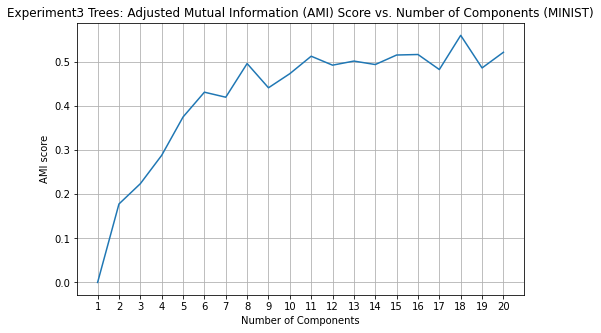

In [97]:
num_components_values = np.arange(1,21,1)
adjusted_mutual_info_score_value = []
for num_components in num_components_values:
    gmm = mixture.GaussianMixture(n_components=num_components, covariance_type="full")
    gmm_labels = gmm.fit_predict(X_Trees)
    adjusted_mutual_info_score_value.append(adjusted_mutual_info_score(y, gmm_labels))
adjusted_mutual_info_score_value = np.array(adjusted_mutual_info_score_value)
plt.figure(figsize=(8,5))
plt.plot(num_components_values,adjusted_mutual_info_score_value, label = "GMM")
plt.xlabel('Number of Components')
plt.ylabel('AMI score')
plt.ticklabel_format(style='plain') 
plt.xticks(num_components_values) 
plt.title('Experiment3 Trees: Adjusted Mutual Information (AMI) Score vs. Number of Components (MINIST)')
plt.grid()
plt.savefig('minist_exp3_gmm_Trees_AMI.png')
plt.show()

# performance

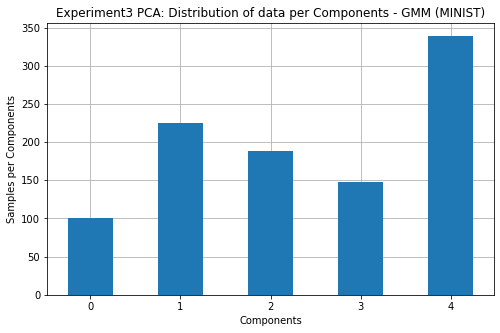

In [112]:
k = 5
gmm = mixture.GaussianMixture(n_components=k, covariance_type="full")
gmm_labels = gmm.fit_predict(X_PCA)



plt.figure(figsize=(8,5))
plt.hist(gmm_labels, bins=np.arange(0, k + 1) - 0.5, rwidth=0.5, zorder=2)
plt.xticks(np.arange(0, k))
plt.xlabel('Components')
plt.ylabel('Samples per Components')
plt.title('Experiment3 PCA: Distribution of data per Components - GMM (MINIST)')
plt.grid()
plt.savefig('minist_exp3_gmm_PCA_distribution.png')

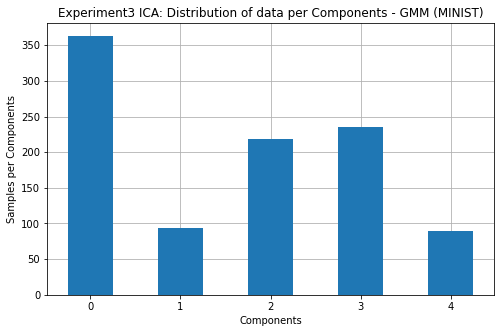

In [113]:
k = 5
gmm = mixture.GaussianMixture(n_components=k, covariance_type="full")
gmm_labels = gmm.fit_predict(X_ICA)


plt.figure(figsize=(8,5))
plt.hist(gmm_labels, bins=np.arange(0, k + 1) - 0.5, rwidth=0.5, zorder=2)
plt.xticks(np.arange(0, k))
plt.xlabel('Components')
plt.ylabel('Samples per Components')
plt.title('Experiment3 ICA: Distribution of data per Components - GMM (MINIST)')
plt.grid()
plt.savefig('minist_exp3_gmm_ICA_distribution.png')

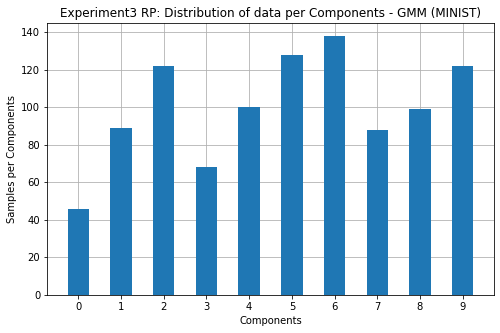

In [114]:
k = 10
gmm = mixture.GaussianMixture(n_components=k, covariance_type="full")
gmm_labels = gmm.fit_predict(X_RP)


plt.figure(figsize=(8,5))
plt.hist(gmm_labels, bins=np.arange(0, k + 1) - 0.5, rwidth=0.5, zorder=2)
plt.xticks(np.arange(0, k))
plt.xlabel('Components')
plt.ylabel('Samples per Components')
plt.title('Experiment3 RP: Distribution of data per Components - GMM (MINIST)')
plt.grid()
plt.savefig('minist_exp3_gmm_RP_distribution.png')

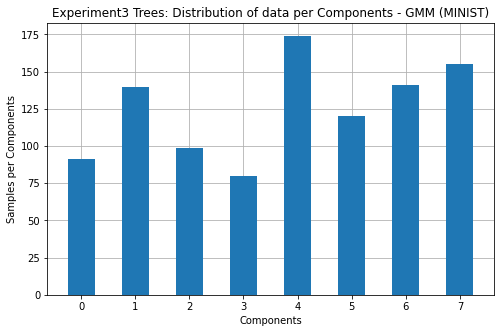

In [115]:
k = 8
gmm = mixture.GaussianMixture(n_components=k, covariance_type="full")
gmm_labels = gmm.fit_predict(X_Trees)


plt.figure(figsize=(8,5))
plt.hist(gmm_labels, bins=np.arange(0, k + 1) - 0.5, rwidth=0.5, zorder=2)
plt.xticks(np.arange(0, k))
plt.xlabel('Components')
plt.ylabel('Samples per Components')
plt.title('Experiment3 Trees: Distribution of data per Components - GMM (MINIST)')
plt.grid()
plt.savefig('minist_exp3_gmm_Trees_distribution.png')

# Plot

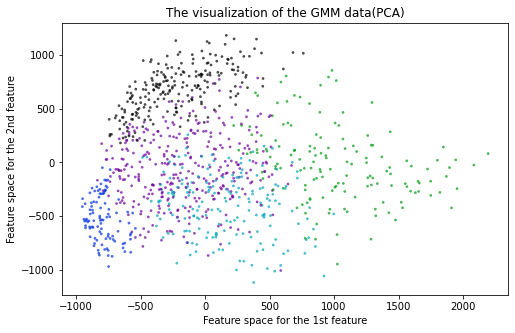

In [120]:
gmm_opt = mixture.GaussianMixture(n_components=5, covariance_type="full")
gmm_labels = gmm_opt.fit_predict(X_PCA)
colors = cm.nipy_spectral(gmm_labels.astype(float) / 9)
plt.figure(figsize=(8,5))
plt.scatter( X_PCA[:, 0], X_PCA[:, 1],marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")
# Labeling the clusters
# centers = gmm_opt.cluster_centers_
# Draw white circles at cluster centers
# plt.scatter(centers[:, 0],centers[:, 1],marker="o",c="white",alpha=1,s=200,edgecolor="k",)

# for i, c in enumerate(centers):
#     plt.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

plt.title("The visualization of the GMM data(PCA)")
plt.xlabel("Feature space for the 1st feature")
plt.ylabel("Feature space for the 2nd feature")
plt.savefig('minist_exp3_gmm_PCA_plot.png')
plt.show()

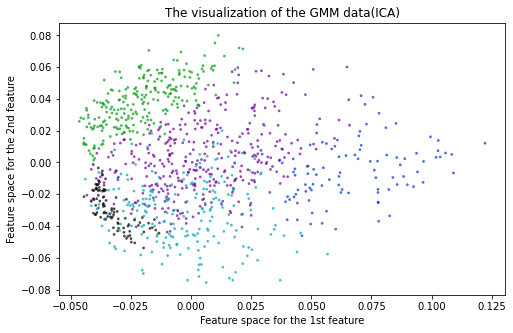

In [121]:
gmm_opt = mixture.GaussianMixture(n_components=5, covariance_type="full")
gmm_labels = gmm_opt.fit_predict(X_ICA)
colors = cm.nipy_spectral(gmm_labels.astype(float) / 9)
plt.figure(figsize=(8,5))
plt.scatter( X_ICA[:, 0], X_ICA[:, 1],marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")
# Labeling the clusters
# centers = gmm_opt.cluster_centers_
# Draw white circles at cluster centers
# plt.scatter(centers[:, 0],centers[:, 1],marker="o",c="white",alpha=1,s=200,edgecolor="k",)

# for i, c in enumerate(centers):
#     plt.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

plt.title("The visualization of the GMM data(ICA)")
plt.xlabel("Feature space for the 1st feature")
plt.ylabel("Feature space for the 2nd feature")
plt.savefig('minist_exp3_gmm_ICA_plot.png')
plt.show()

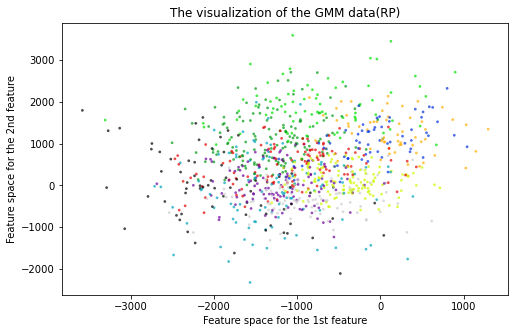

In [122]:
gmm_opt = mixture.GaussianMixture(n_components=10, covariance_type="full")
gmm_labels = gmm_opt.fit_predict(X_RP)
colors = cm.nipy_spectral(gmm_labels.astype(float) / 9)
plt.figure(figsize=(8,5))
plt.scatter( X_RP[:, 0], X_RP[:, 1],marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")
# Labeling the clusters
# centers = gmm_opt.cluster_centers_
# Draw white circles at cluster centers
# plt.scatter(centers[:, 0],centers[:, 1],marker="o",c="white",alpha=1,s=200,edgecolor="k",)

# for i, c in enumerate(centers):
#     plt.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

plt.title("The visualization of the GMM data(RP)")
plt.xlabel("Feature space for the 1st feature")
plt.ylabel("Feature space for the 2nd feature")
plt.savefig('minist_exp3_gmm_RP_plot.png')
plt.show()

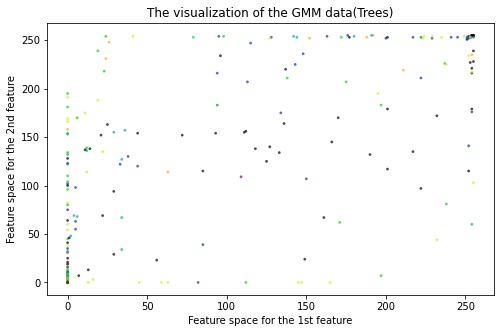

In [123]:
gmm_opt = mixture.GaussianMixture(n_components=8, covariance_type="full")
gmm_labels = gmm_opt.fit_predict(X_Trees)
colors = cm.nipy_spectral(gmm_labels.astype(float) / 9)
plt.figure(figsize=(8,5))
plt.scatter( X_Trees[:, 0], X_Trees[:, 1],marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")
# Labeling the clusters
# centers = gmm_opt.cluster_centers_
# Draw white circles at cluster centers
# plt.scatter(centers[:, 0],centers[:, 1],marker="o",c="white",alpha=1,s=200,edgecolor="k",)

# for i, c in enumerate(centers):
#     plt.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

plt.title("The visualization of the GMM data(Trees)")
plt.xlabel("Feature space for the 1st feature")
plt.ylabel("Feature space for the 2nd feature")
plt.savefig('minist_exp3_gmm_Trees_plot.png')
plt.show()